# Using the New Map Widget

This version 1.5.beta of the ArcGIS API for Python includes a new map widget in Jupyter notebooks that adds support for 3D, WebScenes, HTML exporting, and more! To install the new beta version, [create a new conda environment](https://conda.io/docs/user-guide/tasks/manage-environments.html) and activate it. Then, run the following command:

```conda install -c esri/label/beta arcgis```

Run `jupyter notebook` to start a new server, and run the following line to assert that you successfully installed the correct beta version.

In [2]:
import arcgis
arcgis.__version__

'1.5.0-beta.9'

You can view the API reference for v1.5.beta [here](https://esri.github.io/arcgis-python-api/apidoc/html/beta/arcgis.widgets.html#mapview).

## Using the New Map Widget (2D Mode)

Just like in previous versions of the ArcGIS API for Python, you create a map by creating any GIS() object, then calling `gis.map()`. Run the below cell:

In [4]:
from arcgis.gis import GIS
gis = GIS(username="DavidJVitale") #or specify portal
usa_map = gis.map('USA', zoomlevel=4)
usa_map

Enter password: ········


MapView(zoom=4.0)

This creates a standard 2D map that you are used to when using the ArcGIS API for Python. However, you will notice that clicking and dragging is a lot smoother in this widget. You can also zoom in and out with your mouse's scroll wheel. Finally, try right rotating the map by clicking and dragging with the right mouse button. v1.5.beta adds support for `rotation` in 2D mode! You can also set the rotation property of the map object from code by running the below cell:

In [5]:
usa_map.rotation = 45

v1.5.beta also includes the same support for WebMaps as previous versions of the API. Try running the below cell to view a public WebMap from the Living Atlas:

In [6]:
from arcgis.mapping import WebMap
traffic_webmap_item = gis.content.get('bbdcd78953e5439985004023c8eda03d')
traffic_webmap = WebMap(traffic_webmap_item)
traffic_webmap

MapView()

# Using the New 3D Mode

v1.5.beta also includes support for 3D mode! You can specify the 'mode' parameter through `gis.map(mode="foo")`, or by setting the `mode` property of any instatiated map object. Run the below cell:

In [7]:
from arcgis.gis import GIS
gis = GIS()
usa_map = gis.map('USA', zoomlevel=4, mode="3D") #Notice `mode="3D"`
usa_map

MapView(mode='3D', zoom=4.0)

Just like 2D mode, you can pan by click-and-drag with the left mouse button, and you can zoom with the mouse wheel. In 3D mode, click-and-drag with the right mouse button modifies the `tilt` field and the `heading` field. 

`tilt` is a number from 0-90: 0 represents a top-down 'birds-eye' view, while 90 represents being completely parallel to the ground, facing the horizon. 

It's important to note that 2D mode uses `rotation` to specify the number of angles clockwise from due north, while 3D mode uses `heading` to specify the number of degrees counterclockwise of due north. See the API reference for more information.

Try running the below two cells, and replace them with your own values!

In [8]:
usa_map.tilt = 45

In [9]:
usa_map.heading = 45

A new feature of the widget is how the `zoom`, `tilt`, `heading`/`rotation`, `basemap`, `center`, `extent`, etc. features are handled. Try running the below cell to gain insight into a few of those properties of the above `usa_map`:

In [11]:
def print_map_info(map):
    print("Mode =\t\t{}".format(map.mode))
    if map.mode == "2D":
        print("Zoom =\t\t{}\n".format(map.zoom) + \
              "Rotation =\t{}".format(map.rotation))
    elif map.mode == "3D":
        print("Zoom =\t\t{}\n".format(map.zoom) + \
              "Tilt =\t\t{}\n".format(map.tilt) + \
              "Heading =\t{}".format(map.heading))
    else:
        raise Exception("Not supported argument")
print_map_info(usa_map)

Mode =		3D
Zoom =		4.943245103298815
Tilt =		29.067994195609046
Heading =	346.834360466405


Now, using your mouse, move the map to a new location, zoom in, modify the tilt and heading, etc. After you've move the camera, run the below cell to print out the current state of those properties:

In [9]:
print_map_info(usa_map)

Mode =		3D
Zoom =		6.161755349663585
Tilt =		71.50776399062936
Heading =	72.54381993054785


The values of those python variables have changed when you moved around in the widget! Experiment with printing out the values of `center`, `extent`, and any of the above properties. See the API reference for more information.

Then, try clicking on this icon on the upper left corner of the widget:

<img src=" 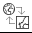"> 

You'll notice that you've switched from 3D mode to 2D mode! All properties, including `map.mode` have been updated! Try running the below cell to see what your current values are:

In [10]:
print_map_info(usa_map)

Mode =		2D
Zoom =		6.0
Rotation =	287.4557570529687


You can always click the icon on the upper left corner to switch between 2D and 3D mode. The widget will do it's best to preserve your current view.

# 3D Feature Layers

Let's create a new map of Zion National Park in Utah. 3D mode will show the elevation of the many canyons, rides, and elevation changes. It will even cast shadows. Run the below cell and explore!

In [12]:
from arcgis.gis import GIS
zion_map = gis.map("Angel's Landing UT", 15)
zion_map.mode = "3D"
zion_map.tilt= 40
zion_map.heading = 180

zion_map

MapView(heading=180.0, mode='3D', tilt=40.0, zoom=15.0)

You can also add Portal items and layers to the 3D map just like before. Run the below cell to add a layer of trails: notice how the trails follow the elevation changes of the land!

In [13]:
trails_layer = gis.content.get('dd0889d7ccd340dd876dac12184e99f9').layers[0]
zion_map.add_layer(trails_layer)

v1.5.beta of the Python API also supports specifying Javascript renderers via [autocasting](https://developers.arcgis.com/javascript/latest/guide/autocasting/index.html). This Python API displays maps in a Jupyter notebook by leveraging the ArcGIS API for JavaScript. By specifying `renderer: "autocast"` for any renderer, you are directing Python to allow the Javascript API to attempt to infer the renderer by following Javascript API rules. Since Python `dict`'s map directly to JavaScript `JSON`, you can specify any [Javascript Renderer](https://developers.arcgis.com/javascript/latest/api-reference/esri-renderers-Renderer.html) for a large range of visualization options! Try running the below code snippet to use a `SimpleRenderer` with a `LineSymbol3D` symbol:

In [14]:
symbol = {
  "type": "line-3d",  # JS type of new LineSymbol3D()
  "symbolLayers": [{
    "type": "path",  # JS type of new PathSymbol3DLayer()
    "size": 20,  # 20 meters in diameter
    "material": { "color": "#0083ff" } #The hex color code
  }]
}
zion_map.add_layer(trails_layer,
    {"renderer" : "autocast", #Tell Python to autocast JS types
     "type" : "simple",  #JS type of SimpleRenderer()
     "symbol": symbol}   #The symbol we previously defined
)

You will notice a much more 3D friendly representation of trails! You can then specify some properties to propery visualize the "Angel's Landing" hike in Zion, one of the most dangerous and exciting hikes in the US! Run the below cell:

In [23]:
zion_map.center = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'x': -12573456.64044217,
 'y': 4476861.2153126905,
 'z': 1638.3878966225311}
zion_map.zoom= 15.528381436708822
zion_map.heading = 190
zion_map.tilt = 45

You can save your current work as a WebScene by calling `map.save()`. Run the following code to save your WebScene!

In [24]:
my_zion_webscene_item = \
    zion_map.save({'title' : 'My Zion Park Web Scene',
                   'snippet' : 'What I made in the new beta ArcGIS API for Python!',
                   'tags' : 'zion, NPS, python'})
my_zion_webscene_item

<Item title:"My Zion Park Web Scene" type:Web Scene owner:DavidJVitale>

You can also view any accesible WebScene by passing in the corresponding portal item, just like viewing WebMaps! Run the below code to see someone else's WebScene of Zion National Park:

In [25]:
from arcgis.mapping import WebScene
other_zion_item = gis.content.get('421433baeb8d487b903d4a89df79149b')
other_zion_webscene = WebScene(other_zion_item)
other_zion_webscene

WebScene(mode='3D')

You are only limitted in your visualization options by the Javascript API: you can specify any renderer and modify any properties of said renderer. To show how poewrful this really is, let's use the SimpleRenderer's [visual variables](https://developers.arcgis.com/javascript/latest/api-reference/esri-renderers-SimpleRenderer.html#visualVariables) functionality. Run the below cell to see a standard Feature Layer about Hurricane tracks in 2D mode.

In [15]:
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
anon_gis = GIS()
hurricane_layer = FeatureLayer(
    url="https://sampleserver6.arcgisonline.com/arcgis/rest/services/Hurricanes/MapServer/0")
hurricane_map = anon_gis.map('Atlantic Ocean', 3)
hurricane_map.add_layer(hurricane_layer)
hurricane_map

MapView(zoom=3.0)

You can represent this same information on a 3D map by specifying a SimpleRenderer using white spheres. Run the below cell, click on some points, and examine some fields:

In [16]:
hurricane_map_3D = anon_gis.map('Atlantic Ocean', 3)
hurricane_map_3D.mode = "3D"
renderer = {"renderer": "autocast", #This tells python to use JS autocasting
  "type": "simple",  # JS type of new SimpleRenderer()
  "symbol": {
    "type": "point-3d",  #JS type of new PointSymbol3D()
    "symbolLayers": [{  
      "type": "object",  #JS type of new ObjectSymbol3DLayer()
      "resource": { "primitive": "sphere" },
      "width": 50000
    }]
  },
}

hurricane_map_3D.add_layer(hurricane_layer, renderer)
hurricane_map_3D

MapView(mode='3D', zoom=3.0)

Now that we have the base set up, lets specify the `visualVariables` field to vary the color of each point for the changing `PRESSURE` field, and vary the size of each point for the changing `WINDSPEED` field. Run the below cell, then try modifying the options to see different results! Maybe try tuning the `"value"` fields to see different color and size variations.

In [18]:
visual_var_map = anon_gis.map('Atlantic Ocean', 3)
visual_var_map.mode = "3D"
#Update the renderer to include visual variable information
renderer["visualVariables"] = [{ #JS configuration of visualVariables
    "type": "color",
    "field": "PRESSURE", 
    "stops": [
      { "value": 950, "color": "red" },
      { "value": 1020, "color": "blue" }
    ]
  }, {
    "type": "size",
    "field": "WINDSPEED",
    "stops": [
      { "value": 20, "size": 60000 },
      { "value": 150, "size": 500000 }
    ],
    "axis": "height"
  }, {
    "type": "size",
    "axis": "width-and-depth",
    "useSymbolValue": True
  }]
visual_var_map.add_layer(hurricane_layer, renderer)
visual_var_map

MapView(mode='3D', zoom=3.0)

## Export to HTML

Another new feature in v1.5.beta is the ability to export the current widget as a standalone HTML file. This added functionality provides a new workflow for creating standalone HTML maps that can be shared with anyone: all they need is a web browser!

The below cell will write the current widget to the file specified by a string path. Run the cell, find the file on your disk, and open it in your favorite web browser.

> Note: You must use publically accesible layers on exported HTML maps

In [20]:
#Use this string unix based file systems
file_path = "/Users/davi9349/devel/uc2018/myHurricaneMap.html"
#Use this string for Windows based file systems
#file_path = r"C:\Users\username\myHurricaneMap.html"
visual_var_map.export_to_html(file_path)